In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1272]:
k = 9
N = 2
h = 1/((k+1))
t = np.arange(0, 1, (1/((k+1)*N)))

In [1273]:
# def ei(x, i = 1, K = k):
#     if (x >= (i-1)/(K+1)).any() and (x <= (i)/(K+1)).any(): return (K+1)*x + 1 - i
#     if (x >= (i)/(K+1)).any() and (x <= (i+1)/(K+1)).any(): return 1 + i - (K+1)*x
#     return 0

def H(x):
    return (np.sign(x)+abs(np.sign(x)))/2

def H1(x):
    return (H(x) + (H(1-x))) - 1

def Hi(x, i, K = k):
    return H1((x)*(K+1)/2 - (i-1)/2)

def e(x):
    return 1 - abs(x)

def ei(x, i, K = k): 
    return e((K+1)*x - i) * Hi(x, i, K)




def e_prime(x):
    return -np.sign(x)

def ei_prime(x, i, K = k): 
    return e_prime((K+1)*x - i) * Hi(x, i, K) * (K+1)

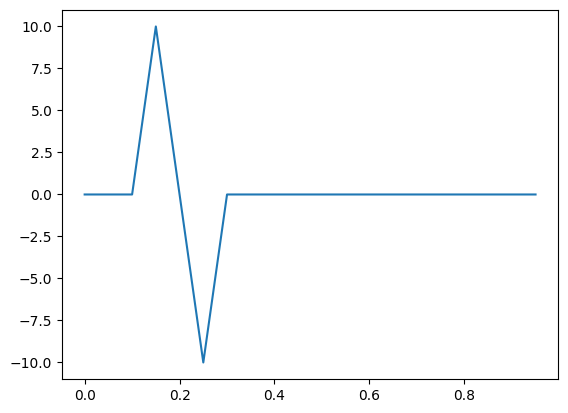

In [1274]:
# for i in range(1, k+1):
#     plt.plot(t, ei_prime(t, i))
# plt.show()

plt.plot(t, ei_prime(t, 2))
plt.show()

In [1275]:
c = np.ones(k)

# for i in range(k):
#     c[i] = np.sin(i+1)

def ci(x, i, K = k):
    return c[i-1] * Hi(x, i, K)

In [1276]:
def ui(x, i):
    return ci(x, i) * ei(x, i)

def U():
    p = np.zeros((k, (k+1)*N))

    for i in range(1, k+1):
        # p[i-1] = ci(t, i)*ui(t, i)
        p[i-1] = ui(t, i)

    g = np.zeros((k+1)*N)
    for i in range(0, k):
        g += p[i]

    return g




def ui_prime(x, i):
    return ci(x, i) * ei_prime(x, i)

def U_prime():
    p = np.zeros((k, (k+1)*N))

    for i in range(1, k+1):
        # p[i-1] = ci(t, i)*ui_prime(t, i)
        p[i-1] = ui_prime(t, i)

    g = np.zeros((k+1)*N)
    for i in range(0, k):
        g += p[i]

    return g

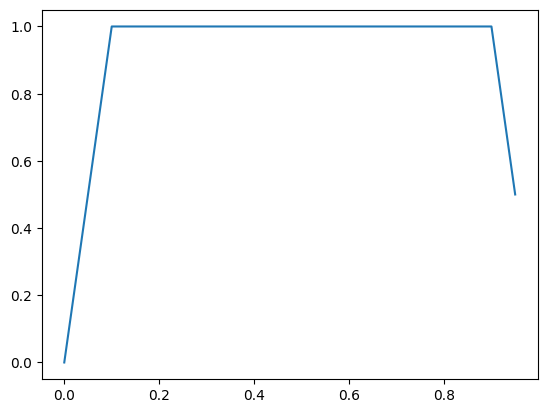

In [1277]:
# for i in range(1, k+1):
#     plt.plot(t, ci(t, i))
# plt.show()

# for i in range(1, k+1):
#     plt.plot(t, ci(t, i)*ui(t, i))
# plt.show()

# p = np.zeros((k, (k+1)**2))

# for i in range(1, k+1):
#     p[i-1] = ci(t, i)*ui(t, i)

# g = np.zeros((k+1)**2)
# for i in range(0, k):
#     g += p[i]

plt.plot(t, U())
plt.show()

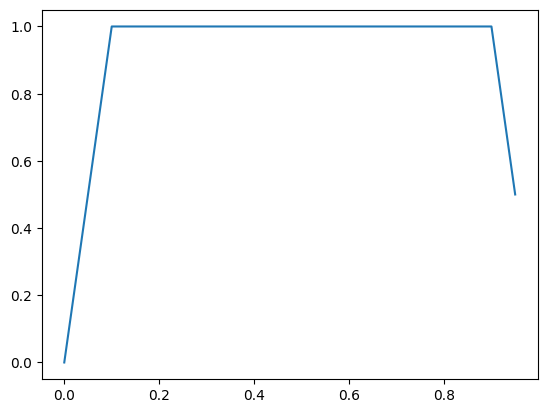

In [1278]:
# for i in range(k):
#     c[i] = np.cos(i+1)

plt.plot(t, U())
plt.show()

In [1279]:
def I(f):
    s = 0
    for i in range(len(t)):
        s += f[i]

    return s*h/N

def I1(f):
    s = 0
    for i in range(len(t)):
        s += f[i]
    return s*h/N/2

def I2(f):
    s = 0
    for i in range(len(t)):
        s += (t[i]**2+1)*np.log(f[i]**2+1)/2  -  (t[i]**2+1)*f[i]*np.arctan(f[i])  +  2*f[i]**2
    return s*h/N

def I3(f):
    s = 0
    for i in range(len(t)):
        s += f[i]

    return s*h/N

In [1280]:
print(I1(U_prime()))
print(I(U()))

0.0
0.9


In [1281]:
def OI(mom):
    global c
    if (mom==c).all():
        return I1(U_prime()) + I2(U()) + I3(U())
    else:
        temp = c.copy()
        c = mom.copy()
        p = OI(c)
        c = temp.copy()
        return p


In [1282]:
# def grad_OI():
#     p = c.copy()
#     for i in range(k):
#         temp = OI()
#         c[i] += h
#         p[i] = (OI() - temp)/h
#         c[i] -= h
#     return p

In [1283]:
def grad_OI(mom = np.zeros(k)):
    global c
    if (mom==c).all(): 
        p = c.copy()
        for i in range(k):
            temp = OI(c)
            c[i] += h
            p[i] = (OI(c) - temp)/h
            c[i] -= h
        return p
    else:
        temp = c.copy()
        c = mom.copy()
        p = grad_OI(c)
        c = temp.copy()
        return p

In [1284]:
def step():
    global c
    p = c.copy()
    w = 2
    grad = grad_OI(c)
    counter = 0
    flag = 0

    while(counter < 10) and (OI(c-w*grad) > OI(c)):
        w = w/2
        counter += 1
    if OI(c-w*grad) > OI(c): flag = 1
    c = c - w*grad
    return flag


In [1285]:
i = 0
while step() == 0:
    i+=1

print(i)


14


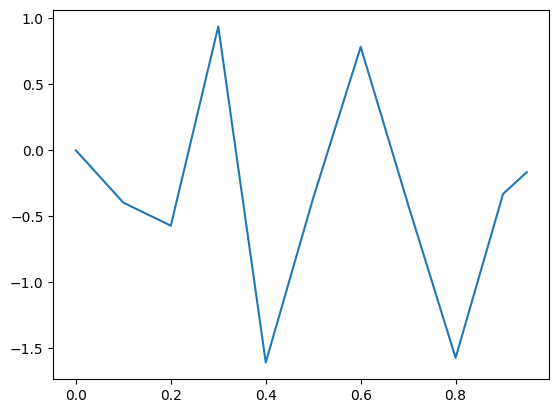

In [1286]:
plt.plot(t, U())
plt.show()